In [1]:
# ========================= KNN Classifier with Newsgroups Dataset =========================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# Load the 20 Newsgroups dataset in a vectorized format (TF-IDF features)
newsgroups = fetch_20newsgroups_vectorized()

# Assign feature matrix (X) and target labels (y)
X, y = newsgroups.data, newsgroups.target

# Display the size of the dataset for a quick overview
print(f"Dataset Overview:\n{'='*30}")
print(f"Number of samples: {X.shape[0]:,}")
print(f"Number of features: {X.shape[1]:,}")
print(f"{'='*30}\n")

# --------------------- Initialize the KNN Classifier ---------------------
# Initialize KNN classifier with 1 neighbor (for simplicity in this case)
knn = KNeighborsClassifier(n_neighbors=1)

# --------------------- Full Dataset Training and Evaluation ---------------------
# Train the KNN model on the entire dataset
knn.fit(X, y)

# Predict on the training data (entire dataset in this case)
y_pred_full = knn.predict(X)

# Calculate and display accuracy for the entire dataset
accuracy_full = accuracy_score(y, y_pred_full)
print(f"Model Performance on the Full Dataset:\n{'-'*40}")
print(f"Accuracy on Full Dataset: {accuracy_full:.3f}")
print(f"{'='*40}\n")

# --------------------- Train-Test Split and Evaluation ---------------------
# Split the dataset into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_test_pred = knn.predict(X_test)

# Calculate accuracy on the test data
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print evaluation summary for the test dataset
print(f"Model Performance on the Test Dataset:\n{'-'*40}")
print(f"Accuracy on Test Dataset: {accuracy_test:.3f}")
print(f"{'='*40}")

Dataset Overview:
Number of samples: 11,314
Number of features: 130,107

Model Performance on the Full Dataset:
----------------------------------------
Accuracy on Full Dataset: 1.000

Model Performance on the Test Dataset:
----------------------------------------
Accuracy on Test Dataset: 0.663


Dataset Overview:
Number of Samples: 178, 
Number of Features: 13
Target Classes: ['class_0' 'class_1' 'class_2']

Logistic Regression Accuracy: 0.994

Predicted Probabilities (Logistic Regression) for the first data point: [[9.99807001e-01 2.52940143e-05 1.67705332e-04]]

Linear SVM Accuracy: 0.989

Kernel SVM Accuracy: 0.708



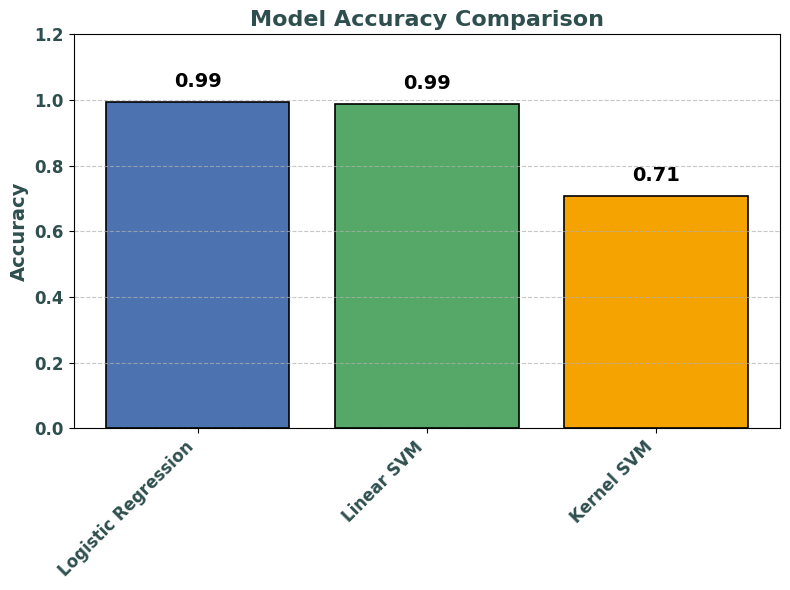

In [2]:
# ========================= Logistic Regression, SVC and LinearSVC Classifiers =========================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC  # SVM classifiers (Linear and Kernel-based)

wine = load_wine()
X, y = wine.data, wine.target

# Display basic information about the dataset
print(f"Dataset Overview:\n{'='*50}")
print(f"Number of Samples: {X.shape[0]:,}, \nNumber of Features: {X.shape[1]:,}")
print(f"Target Classes: {wine.target_names}")
print(f"{'='*50}\n")

# --------------------- Logistic Regression Classifier ---------------------
# Initialize the Logistic Regression model with multi-class handling
lr = LogisticRegression(max_iter=10000, random_state=42)

# Fit the model on the wine dataset
lr.fit(X, y)

# Evaluate the model's accuracy on the dataset
lr_accuracy = lr.score(X, y)
print(f"Logistic Regression Accuracy: {lr_accuracy:.3f}", end="\n\n")

# Predict probabilities for the first data point
lr_probs = lr.predict_proba(X[:1])
print(f"Predicted Probabilities (Logistic Regression) for the first data point: {lr_probs}\n")

# --------------------- Linear SVM Classifier ---------------------
# Initialize the Linear Support Vector Classifier (Linear SVM)
linear_svm = LinearSVC(max_iter=10000, random_state=42)

# Fit the Linear SVM model
linear_svm.fit(X, y)

# Evaluate the model's accuracy
linear_svm_accuracy = linear_svm.score(X, y)
print(f"Linear SVM Accuracy: {linear_svm_accuracy:.3f}\n")

# --------------------- Kernel SVM Classifier ---------------------
# Initialize the Kernel Support Vector Classifier (SVC with RBF kernel)
kernel_svm = SVC(random_state=42, probability=True)

# Fit the Kernel SVM model
kernel_svm.fit(X, y)

# Evaluate the model's accuracy
kernel_svm_accuracy = kernel_svm.score(X, y)
print(f"Kernel SVM Accuracy: {kernel_svm_accuracy:.3f}\n")

# --------------------- Model Accuracy Comparison ---------------------
# Plot a bar chart for accuracy comparison between the three models
plt.figure(figsize=(8, 6))
methods = ["Logistic Regression", "Linear SVM", "Kernel SVM"]
accuracies = [lr_accuracy, linear_svm_accuracy, kernel_svm_accuracy]
colors = ["#4C72B0", "#55A868", "#F4A300"]
bars = plt.bar(methods, accuracies, color=colors, edgecolor="black", linewidth=1.2)
plt.bar_label(bars, fmt="%.2f", fontsize=14, fontweight="bold", color="black", padding=8)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight="bold", color="#2F4F4F")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold", color="#2F4F4F")
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight="bold", color="#2F4F4F")
plt.yticks(fontsize=12, fontweight="bold", color="#2F4F4F")
plt.ylim(0, 1.2)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

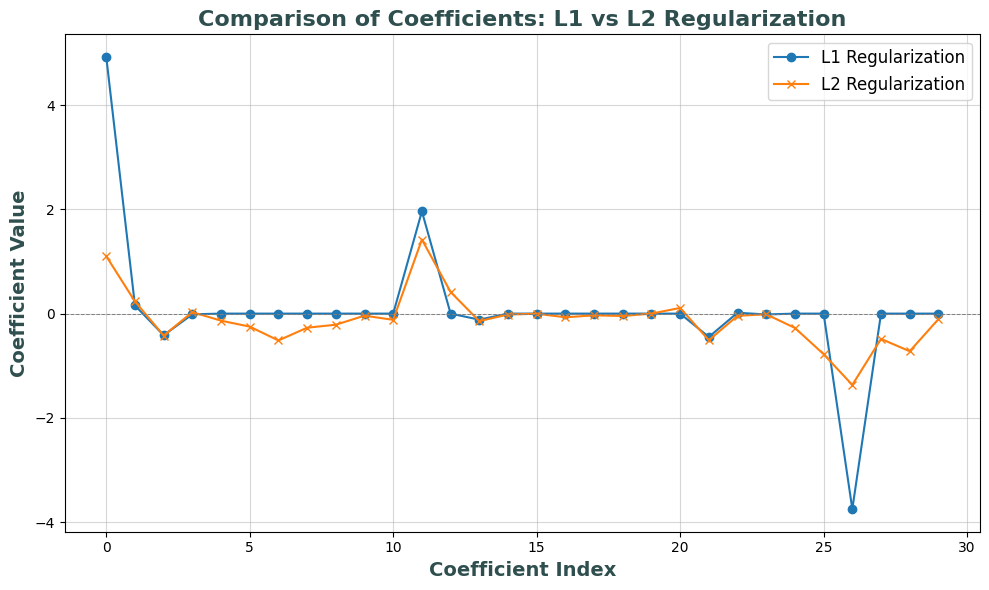


Accuracy of Logistic Regression with L1 Regularization: 0.958
Accuracy of Logistic Regression with L2 Regularization: 0.965


In [3]:
# ======================= L1 and L2 Regularization in Classification Problem =======================
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression with L1 regularization
lr_L1 = LogisticRegression(solver="liblinear", penalty="l1", max_iter=10000, random_state=42)

# Logistic Regression with L2 regularization (default)
lr_L2 = LogisticRegression(penalty="l2", max_iter=10000, random_state=42)  # penalty="l2" by default

# Fit both models on the training data
lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

# Plot the coefficients of both models
plt.figure(figsize=(10, 6))
plt.plot(lr_L1.coef_.flatten(), label="L1 Regularization", marker="o")  # L1 coefficients
plt.plot(lr_L2.coef_.flatten(), label="L2 Regularization", marker="x")  # L2 coefficients

# Add plot details
plt.title("Comparison of Coefficients: L1 vs L2 Regularization", fontsize=16, fontweight="bold", color="#2F4F4F")
plt.xlabel("Coefficient Index", fontsize=14, fontweight="bold", color="#2F4F4F")
plt.ylabel("Coefficient Value", fontsize=14, fontweight="bold", color="#2F4F4F")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)  # Add a horizontal line at y=0
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Evaluate and print the scores of both models
score_L1 = lr_L1.score(X_test, y_test)
score_L2 = lr_L2.score(X_test, y_test)
print(f"\nAccuracy of Logistic Regression with L1 Regularization: {score_L1:.3f}")
print(f"Accuracy of Logistic Regression with L2 Regularization: {score_L2:.3f}")

In [4]:
# ======================= Logistic Regression and Linear SVM using SGDClassifier =======================
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import SGDClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression using SGDClassifier
logreg = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)

# Linear SVM using SGDClassifier
linsvm = SGDClassifier(loss="hinge", max_iter=1000, random_state=42)

# Train Logistic Regression model
logreg.fit(X_train, y_train)

# Train Linear SVM model
linsvm.fit(X_train, y_train)

# Evaluate Logistic Regression model
logreg_predictions = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.3f}\n{'-'*55}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_predictions, target_names=data.target_names))
print(f"{'='*55}\n")

# Evaluate Linear SVM model
linsvm_predictions = linsvm.predict(X_test)
linsvm_accuracy = accuracy_score(y_test, linsvm_predictions)
print(f"Linear SVM Accuracy: {linsvm_accuracy:.3f}\n{'-'*55}")
print("Classification Report for Linear SVM:")
print(classification_report(y_test, linsvm_predictions, target_names=data.target_names))

Logistic Regression Accuracy: 0.930
-------------------------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   malignant       0.88      0.94      0.91        54
      benign       0.96      0.92      0.94        89

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143


Linear SVM Accuracy: 0.923
-------------------------------------------------------
Classification Report for Linear SVM:
              precision    recall  f1-score   support

   malignant       1.00      0.80      0.89        54
      benign       0.89      1.00      0.94        89

    accuracy                           0.92       143
   macro avg       0.95      0.90      0.91       143
weighted avg       0.93      0.92      0.92       143

